In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/asus/Downloads/bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
data.shape

(11162, 17)

# Handling missing values

In [4]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.drop(columns = ['default','housing','loan','contact','day','month','duration','pdays','poutcome'], inplace=True)

In [7]:
data

,age,job,marital,education,balance,campaign,previous,deposit
0,59,admin.,married,secondary,2343,1,0,yes
1,56,admin.,married,secondary,45,1,0,yes
2,41,technician,married,secondary,1270,1,0,yes
3,55,services,married,secondary,2476,1,0,yes
4,54,admin.,married,tertiary,184,2,0,yes
...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,1,0,no
11158,39,services,married,secondary,733,4,0,no
11159,32,technician,single,secondary,29,2,0,no
11160,43,technician,married,secondary,0,2,5,no


In [19]:
data.describe()

,age,job,marital,education,balance,campaign,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,1528.538524,1.503942,0.824673,0.473840
std,11.913369,3.225132,0.625552,0.749478,3225.413326,2.652133,2.156619,0.499338
min,18.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,122.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,550.000000,1.000000,0.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,1708.000000,2.000000,1.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,81204.000000,35.000000,33.000000,1.000000


<Axes: >

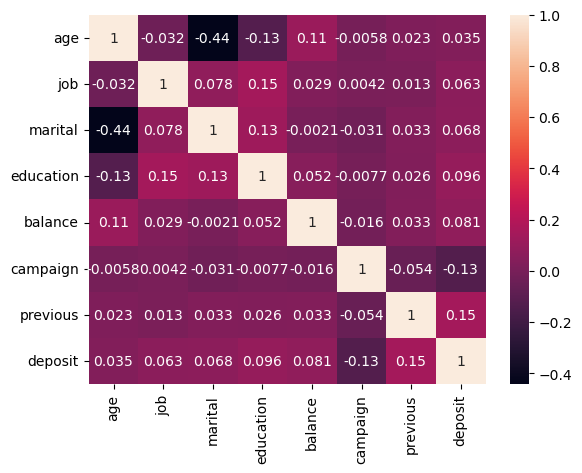

In [20]:
sns.heatmap( data.corr(), annot=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['campaign'] = encoder.fit_transform(data['campaign'])
data['previous'] = encoder.fit_transform(data['previous'])

In [10]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

In [11]:
data.head()

,age,job,marital,education,balance,campaign,previous,deposit
0,59,0,1,1,2343,0,0,1
1,56,0,1,1,45,0,0,1
2,41,9,1,1,1270,0,0,1
3,55,7,1,1,2476,0,0,1
4,54,0,1,2,184,1,0,1


# Splitting the train and test dataset

In [12]:
X = data.drop(columns=['deposit'])
y = data['deposit']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5826242722794447


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1166
           1       0.56      0.57      0.56      1067

    accuracy                           0.58      2233
   macro avg       0.58      0.58      0.58      2233
weighted avg       0.58      0.58      0.58      2233



# Visualize the Decision Tree

In [18]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- previous <= 0.50
|   |--- age <= 60.50
|   |   |--- marital <= 1.50
|   |   |   |--- balance <= 819.50
|   |   |   |   |--- balance <= 35.50
|   |   |   |   |   |--- marital <= 0.50
|   |   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |   |--- age <= 27.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  27.00
|   |   |   |   |   |   |   |   |--- balance <= -12.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- balance >  -12.50
|   |   |   |   |   |   |   |   |   |--- balance <= -3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- balance >  -3.00
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- campaign >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |--- age >  31.50
| 